Thanks to https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ for helping me with this part of how to pick an ARIMA model that is a good fit to the data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

In [8]:
# Load the Microsoft Stock dataset
ticker = 'SPY'
df = yf.download(ticker, start='2024-01-01')
ts = df['Adj Close']

[*********************100%%**********************]  1 of 1 completed


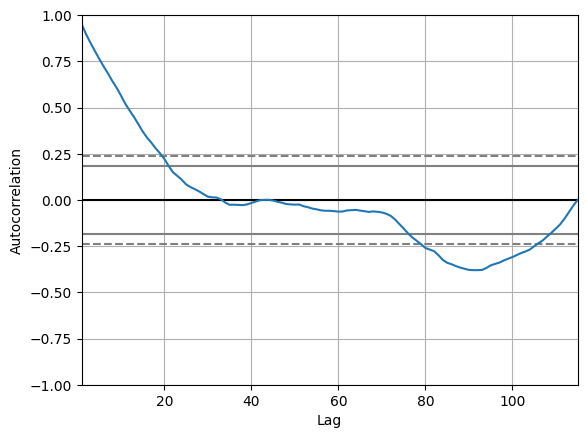

In [9]:
autocorrelation_plot(ts)
plt.show()

In [29]:
model = ARIMA(ts, order=(20, 1, 0))
model_fit = model.fit()
model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  115
Model:                ARIMA(20, 1, 0)   Log Likelihood                -291.345
Date:                Fri, 14 Jun 2024   AIC                            624.691
Time:                        12:57:12   BIC                            682.151
Sample:                             0   HQIC                           648.010
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0434      0.112      0.387      0.699      -0.177       0.263
ar.L2         -0.2312      0.118     -1.965      0.049      -0.462      -0.001
ar.L3          0.0720      0.124      0.579      0.563      -0.172       0.316
ar.L4          0.1907      0.135      1.415      0.157      -0.073       0.455
ar.L5         -0.0351      0.102     -0.344      0.731      -0.235       0.165
ar.L6          0.0598      0.102      0.586      0.558      -0.140       0.260
ar.L7          0.1273      0.096      1.331      0.183      -0.060       0.315
ar.L8         -0.0060      0.112     -0.054      0.957      -0.225       0.213
ar.L9          0.2191      0.105      2.082      0.037       0.013       0.425
ar.L10        -0.0355      0.115     -0.310      0.757      -0.260       0.189
ar.L11         0.0229      0.117      0.195      0.845      -0.207       0.253
ar.L12         0.0547      0.113      0.484      0.628      -0.167       0.276
ar.L13        -0.0374      0.111     -0.337      0.736      -0.255       0.180
ar.L14         0.0378      0.099      0.380      0.704      -0.157       0.233
ar.L15        -0.0790      0.137     -0.579      0.563      -0.347       0.189
ar.L16        -0.2999      0.107     -2.813      0.005      -0.509      -0.091
ar.L17         0.0498      0.115      0.432      0.666      -0.177       0.276
ar.L18        -0.1281      0.122     -1.046      0.296      -0.368       0.112
ar.L19         0.1775      0.119      1.496      0.135      -0.055       0.410
ar.L20         0.1163      0.149      0.783      0.434      -0.175       0.407
sigma2         9.4603      1.465      6.457      0.000       6.589      12.332
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.80   Prob(JB):                         0.83
Heteroskedasticity (H):               0.88   Skew:                             0.12
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

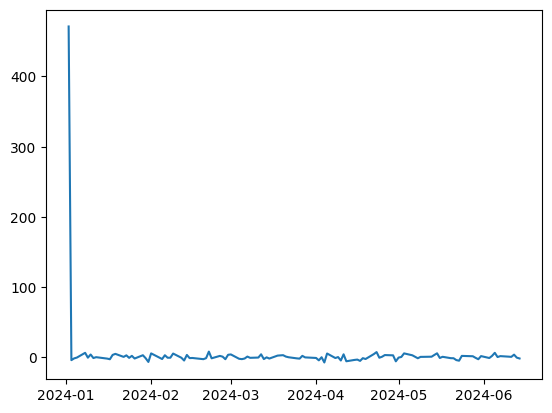

In [30]:
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)

<Axes: ylabel='Density'>

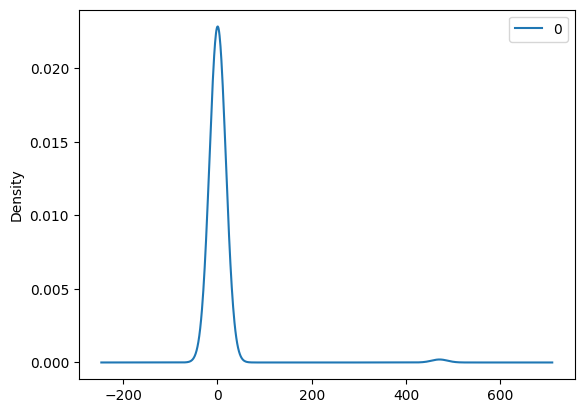

In [13]:
residuals.plot(kind = 'kde')

In [18]:
X = ts.values
size = int(len(X) * 0.8) # train it on 80% of the data
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [31]:
predictions = []
for t in range(len(test)):
 model = ARIMA(history, order=(20,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=540.469011, expected=523.299988
predicted=525.591838, expected=529.780029
predicted=533.408579, expected=528.690002
predicted=529.984165, expected=529.450012
predicted=527.105940, expected=530.059998
predicted=532.020966, expected=531.359985
predicted=529.620882, expected=529.830017
predicted=526.600936, expected=525.960022
predicted=530.305596, expected=529.440002
predicted=527.593556, expected=529.809998
predicted=530.408255, expected=526.099976
predicted=525.163234, expected=522.609985
predicted=521.194237, expected=527.369995
predicted=527.342965, expected=527.799988
predicted=526.141950, expected=528.390015
predicted=531.775691, expected=534.669983
predicted=534.617575, expected=534.659973
predicted=532.361846, expected=534.010010
predicted=535.149099, expected=535.659973
predicted=534.096099, expected=536.950012
predicted=536.351111, expected=541.359985
predicted=541.129582, expected=542.450012
predicted=542.845781, expected=541.744995


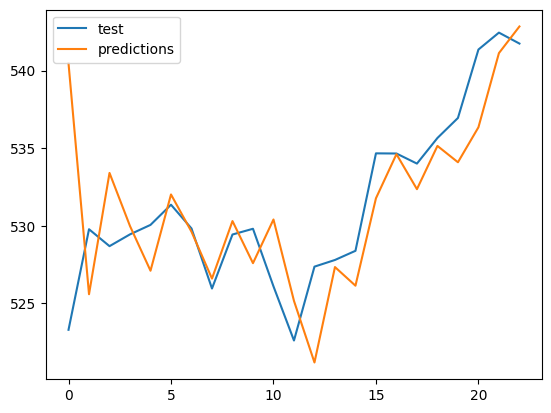

In [32]:
plt.plot(test, label = "test")
plt.plot(predictions, label = "predictions")
plt.legend()
plt.show()

In [28]:
rmse = mean_squared_error(test, predictions)
rmse

22.75235068201118